In [1]:
import os
import time
import torch
import argparse
import numpy as np
from inference import infer
from utils.util import mode
from hparams import hparams as hps
from waveglow.denoiser import Denoiser
import matplotlib
import matplotlib.pyplot as plt
import librosa.display as display
import IPython.display as ipd
import matplotlib.image as Image
matplotlib.use('TkAgg')
%matplotlib inline 

In [2]:
parser = argparse.ArgumentParser()
# path
parser.add_argument('-d', '--data_dir', type = str, default = 'X:/staff-bulk/ewi/insy/MMC/xinsheng/data/LJSpeech-1.1',
                    help = 'directory to load data')
parser.add_argument('-l', '--log_dir', type = str, default = 'log',
                    help = 'directory to save tensorboard logs')
parser.add_argument('-cd', '--ckpt_dir', type = str, default = 'ckpt',
                    help = 'directory to save checkpoints')
parser.add_argument('-cp', '--ckpt_pth', type = str, default = '',
                    help = 'path to load checkpoints')

args = parser.parse_args(args=[])

In [3]:
waveglow_path = 'X:/staff-bulk/ewi/insy/MMC/xinsheng/code/Image2speech/tacotron_based/waveglow_256channels.pt'
waveglow = torch.load(waveglow_path)['model']
denoiser = Denoiser(waveglow).cuda()

d:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source 

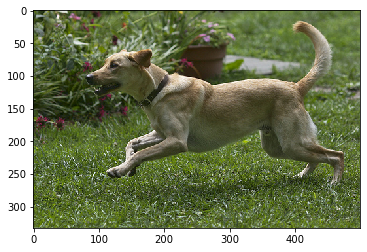

In [15]:
epoch = 475
root = 'X:/staff-bulk/ewi/insy/MMC/xinsheng/code/Image2speech/Proposed_method/BU_with_info_with_ec_schedule_sampling/output/160/BU/mels'
epoch_path = os.path.join(root,str(epoch))
names = os.listdir(epoch_path)
name = names[2]
path = os.path.join(epoch_path,name)
mel = np.load(path)

img_path = os.path.join('X:/staff-bulk/ewi/insy/MMC/xinsheng/data/Flickr8k/images',name).replace('.npy','.jpg')

with torch.no_grad():
    audios = waveglow.infer(torch.from_numpy(mel).cuda().unsqueeze(0),sigma=hps.sigma_infer)
    audios = audios.float()
    audios = denoiser(audios, strength=hps.denoising_strength).squeeze(1) 
    audio = audios[0]/torch.max(torch.abs(audios))

img = Image.imread(img_path)
plt.imshow(img)
plt.show()

In [16]:
ipd.Audio(audio.data.cpu().numpy(), rate=hps.sample_rate)

In [3]:
sr, wav = wavfile.read('synth.wav')
slice_wav = wav[:-2000]
ipd.Audio(slice_wav.data.cpu().numpy(), rate=hps.sample_rate)
#         save_path = os.path.join(save_root,wav_name)
#         wavfile.write(save_path, sr, slice_wav)

NameError: name 'wavfile' is not defined

In [10]:
ipd.Audio(audio2.data.cpu().numpy(), rate=hps.sample_rate)

NameError: name 'audio2' is not defined

In [ ]:
plt.figure()
display.specshow(mel)
plt.show()

In [20]:
for i in (list(np.arange(100,1001,50))):
      print (i)

100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


with torch.no_grad():
    audios = waveglow.infer(torch.from_numpy(mel1).cuda(),sigma=hps.sigma_infer)
    audios = audios.float()
    audios = denoiser(audios, strength=hps.denoising_strength).squeeze(1)

for j, audio in enumerate(audios):
    key = keys[j]
    root = os.path.join(args.save_path,'audios',str(epoch))
    if not os.path.exists(root):
        os.makedirs(root)
    path = os.path.join(root,key) + '.wav'

    audio = audio[:mel_lengths[j]*hps.seft_hop_length]
    # mel_feat = mel[j][:mel_lengths[j]]

    audio = audio/torch.max(torch.abs(audio))